<a href="https://colab.research.google.com/github/isnanramalia/klasifikasi-siswa-dropout/blob/main/decisiontreeuts_(1)%F0%9F%93%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KLASIFIKASI | DECISION TREE🎄



*  [Dataset](https://docs.google.com/spreadsheets/d/1IjMk_OGMfUbqWBfhta5ZgZwYPYtKBbHyJn-0-MisClY/edit?usp=sharing)
*  [CRISP-DM doc](https://docs.google.com/document/d/1Bo91E5Gwzc4f9ZwuIAaoKVDFltObIemaaA76P-mk5xg/edit?usp=sharing)
*   [Algorithm Source](https://youtu.be/SxGPgMVbbSk?si=eHZw26Ix6nzWvr5v)




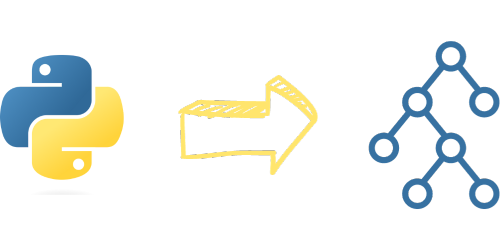


# LIBRARY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
data = pd.read_csv("data_smk_askha_1.csv")

data.head()

,JK,Tanggal Lahir,Tempat Lahir,Asal Kecamatan,Jenis Tinggal,Alat Transportasi,Jenjang Pendidikan Ayh,Pekerjaan Ayh,Penghasilan Ayh,Jenjang Pendidikan Ibu,Pekerjaan Ibu,Penghasilan Ibu,Keluar Karena
0,L,2003-01-28,SEMARANG,Cilacap Tengah,Bersama orang tua,Sepeda,SMP / sederajat,Wiraswasta,"Rp. 5,000,000 - Rp. 20,000,000",D3,Karyawan Swasta,"Rp. 2,000,000 - Rp. 4,999,999",Lulus
1,L,2004-11-14,SEMARANG,Mijen,Bersama orang tua,Jalan kaki,SMA / sederajat,Karyawan Swasta,"Rp. 500,000 - Rp. 999,999",SMP / sederajat,Karyawan Swasta,"Rp. 2,000,000 - Rp. 4,999,999",Lulus
2,L,2006-05-26,Semarang,Ngaliyan,Bersama orang tua,Ojek,SD / sederajat,Karyawan Swasta,"Rp. 1,000,000 - Rp. 1,999,999",SMP / sederajat,Tidak bekerja,Tidak Berpenghasilan,Mutasi
3,L,1998-07-08,TEGAL,Balapulang,Panti asuhan,Sepeda motor,SD / sederajat,Buruh,"Rp. 1,000,000 - Rp. 1,999,999",SD / sederajat,Buruh,"Rp. 1,000,000 - Rp. 1,999,999",Lulus
4,L,1995-12-18,SEMARANG,Semarang,Asrama,Jalan kaki,SD / sederajat,Petani,NaN,SD / sederajat,Petani,NaN,Lulus


In [3]:
data.shape

(1036, 13)

# PREPROCESSING DATA

In [14]:
# ubah format tanggal lahir dgn hanya tahun saja (agar lbh general)
data['Tanggal Lahir'] = pd.to_datetime(data['Tanggal Lahir']).dt.year

In [15]:
print(data)

     JK  Tanggal Lahir Tempat Lahir  Asal Kecamatan      Jenis Tinggal  \
0     L           2003     SEMARANG  Cilacap Tengah  Bersama orang tua   
1     L           2004     SEMARANG           Mijen  Bersama orang tua   
2     L           2006     Semarang        Ngaliyan  Bersama orang tua   
3     L           1998        TEGAL      Balapulang       Panti asuhan   
4     L           1995     SEMARANG        Semarang             Asrama   
...  ..            ...          ...             ...                ...   
1031  P           2002     SEMARANG   Ungaran Timur          Pesantren   
1032  P           2006     Semarang        Podorejo  Bersama orang tua   
1033  P           1997       KENDAL       Limbangan             Asrama   
1034  P           2001     SEMARANG         Tuntang                NaN   
1035  P           2003     Semarang        Ngaliyan             Asrama   

     Alat Transportasi Jenjang Pendidikan Ayh    Pekerjaan Ayh  \
0               Sepeda        SMP / sederajat

In [16]:
# menghitung jumlah missing value di setiap kolom
data.isnull().sum()

JK                          0
Tanggal Lahir               0
Tempat Lahir                0
Asal Kecamatan              0
Jenis Tinggal              37
Alat Transportasi          29
Jenjang Pendidikan Ayh     42
Pekerjaan Ayh              42
Penghasilan Ayh           291
Jenjang Pendidikan Ibu     24
Pekerjaan Ibu              25
Penghasilan Ibu           320
Keluar Karena               0
dtype: int64

In [17]:
# mengisi missing value dgn modulus
data["Jenis Tinggal"].fillna(data["Jenis Tinggal"].mode().iloc[0], inplace=True)
data["Alat Transportasi"].fillna(data["Alat Transportasi"].mode().iloc[0], inplace=True)
data["Jenjang Pendidikan Ayh"].fillna(data["Jenjang Pendidikan Ayh"].mode().iloc[0], inplace=True)
data["Penghasilan Ayh"].fillna(data["Penghasilan Ayh"].mode().iloc[0], inplace=True)
data["Pekerjaan Ayh"].fillna(data["Penghasilan Ayh"].mode().iloc[0], inplace=True)
data["Jenjang Pendidikan Ibu"].fillna(data["Jenjang Pendidikan Ibu"].mode().iloc[0], inplace=True)
data["Pekerjaan Ibu"].fillna(data["Pekerjaan Ibu"].mode().iloc[0], inplace=True)
data["Penghasilan Ibu"].fillna(data["Penghasilan Ibu"].mode().iloc[0], inplace=True)

# setelah di preprocessing
data.isnull().sum()

JK                        0
Tanggal Lahir             0
Tempat Lahir              0
Asal Kecamatan            0
Jenis Tinggal             0
Alat Transportasi         0
Jenjang Pendidikan Ayh    0
Pekerjaan Ayh             0
Penghasilan Ayh           0
Jenjang Pendidikan Ibu    0
Pekerjaan Ibu             0
Penghasilan Ibu           0
Keluar Karena             0
dtype: int64

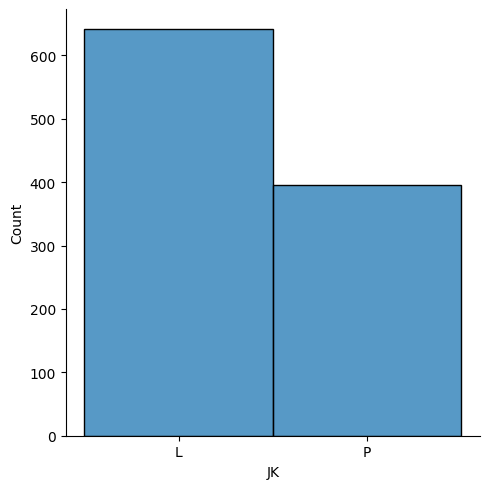

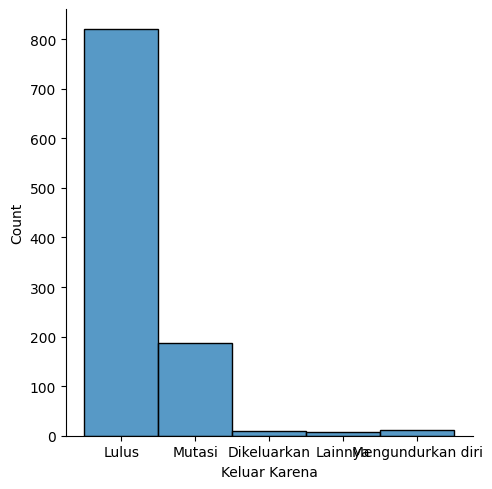

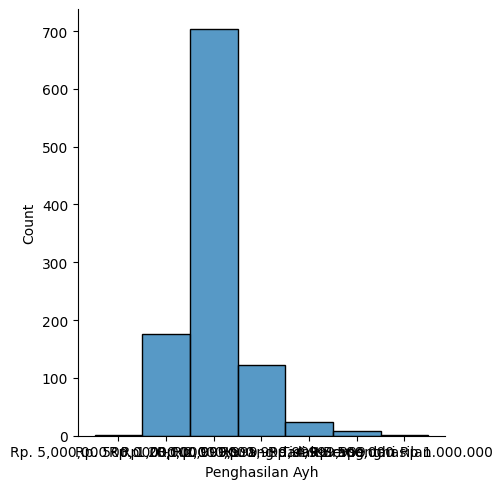

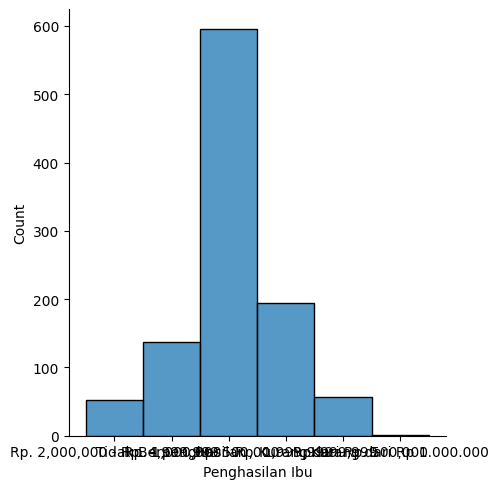

In [18]:
# visualisasi data
ax = sns.displot(data, x = "JK")
ax = sns.displot(data, x = "Keluar Karena")
ax = sns.displot(data, x = "Penghasilan Ayh")
ax = sns.displot(data, x = "Penghasilan Ibu")

In [19]:
data["JK"] = pd.factorize(data.JK)[0]
data["Tempat Lahir"] = pd.factorize(data["Tempat Lahir"])[0]
data["Asal Kecamatan"] = pd.factorize(data["Asal Kecamatan"])[0]
data["Jenis Tinggal"] = pd.factorize(data["Jenis Tinggal"])[0]
data["Alat Transportasi"] = pd.factorize(data["Alat Transportasi"])[0]
data["Jenjang Pendidikan Ayh"] = pd.factorize(data["Jenjang Pendidikan Ayh"])[0]
data["Pekerjaan Ayh"] = pd.factorize(data["Pekerjaan Ayh"])[0]
data["Penghasilan Ayh"] = pd.factorize(data["Penghasilan Ayh"])[0]
data["Jenjang Pendidikan Ibu"] = pd.factorize(data["Jenjang Pendidikan Ibu"])[0]
data["Pekerjaan Ibu"] = pd.factorize(data["Pekerjaan Ibu"])[0]
data["Penghasilan Ibu"] = pd.factorize(data["Penghasilan Ibu"])[0]
data["Keluar Karena"] = pd.factorize(data["Keluar Karena"])[0]

# Save data
data.to_csv("data_numerik_satu.csv")

# PENGOLAHAN DATA

In [20]:
# splitting the data
from sklearn.model_selection import train_test_split

# define input and target variable
x = data[["JK", "Tempat Lahir", "Asal Kecamatan", "Jenis Tinggal", "Alat Transportasi", "Jenjang Pendidikan Ayh", "Pekerjaan Ayh", "Penghasilan Ayh", "Pekerjaan Ibu", "Penghasilan Ibu"]]
y = data["Keluar Karena"]

# splitting test and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
from sklearn import tree

# define classification algorithm
dt_clf = tree.DecisionTreeClassifier(max_depth = 3, criterion = "entropy")
dt_clf = dt_clf.fit(x_train, y_train)

# generating prediction
y_pred = dt_clf.predict(x_test)

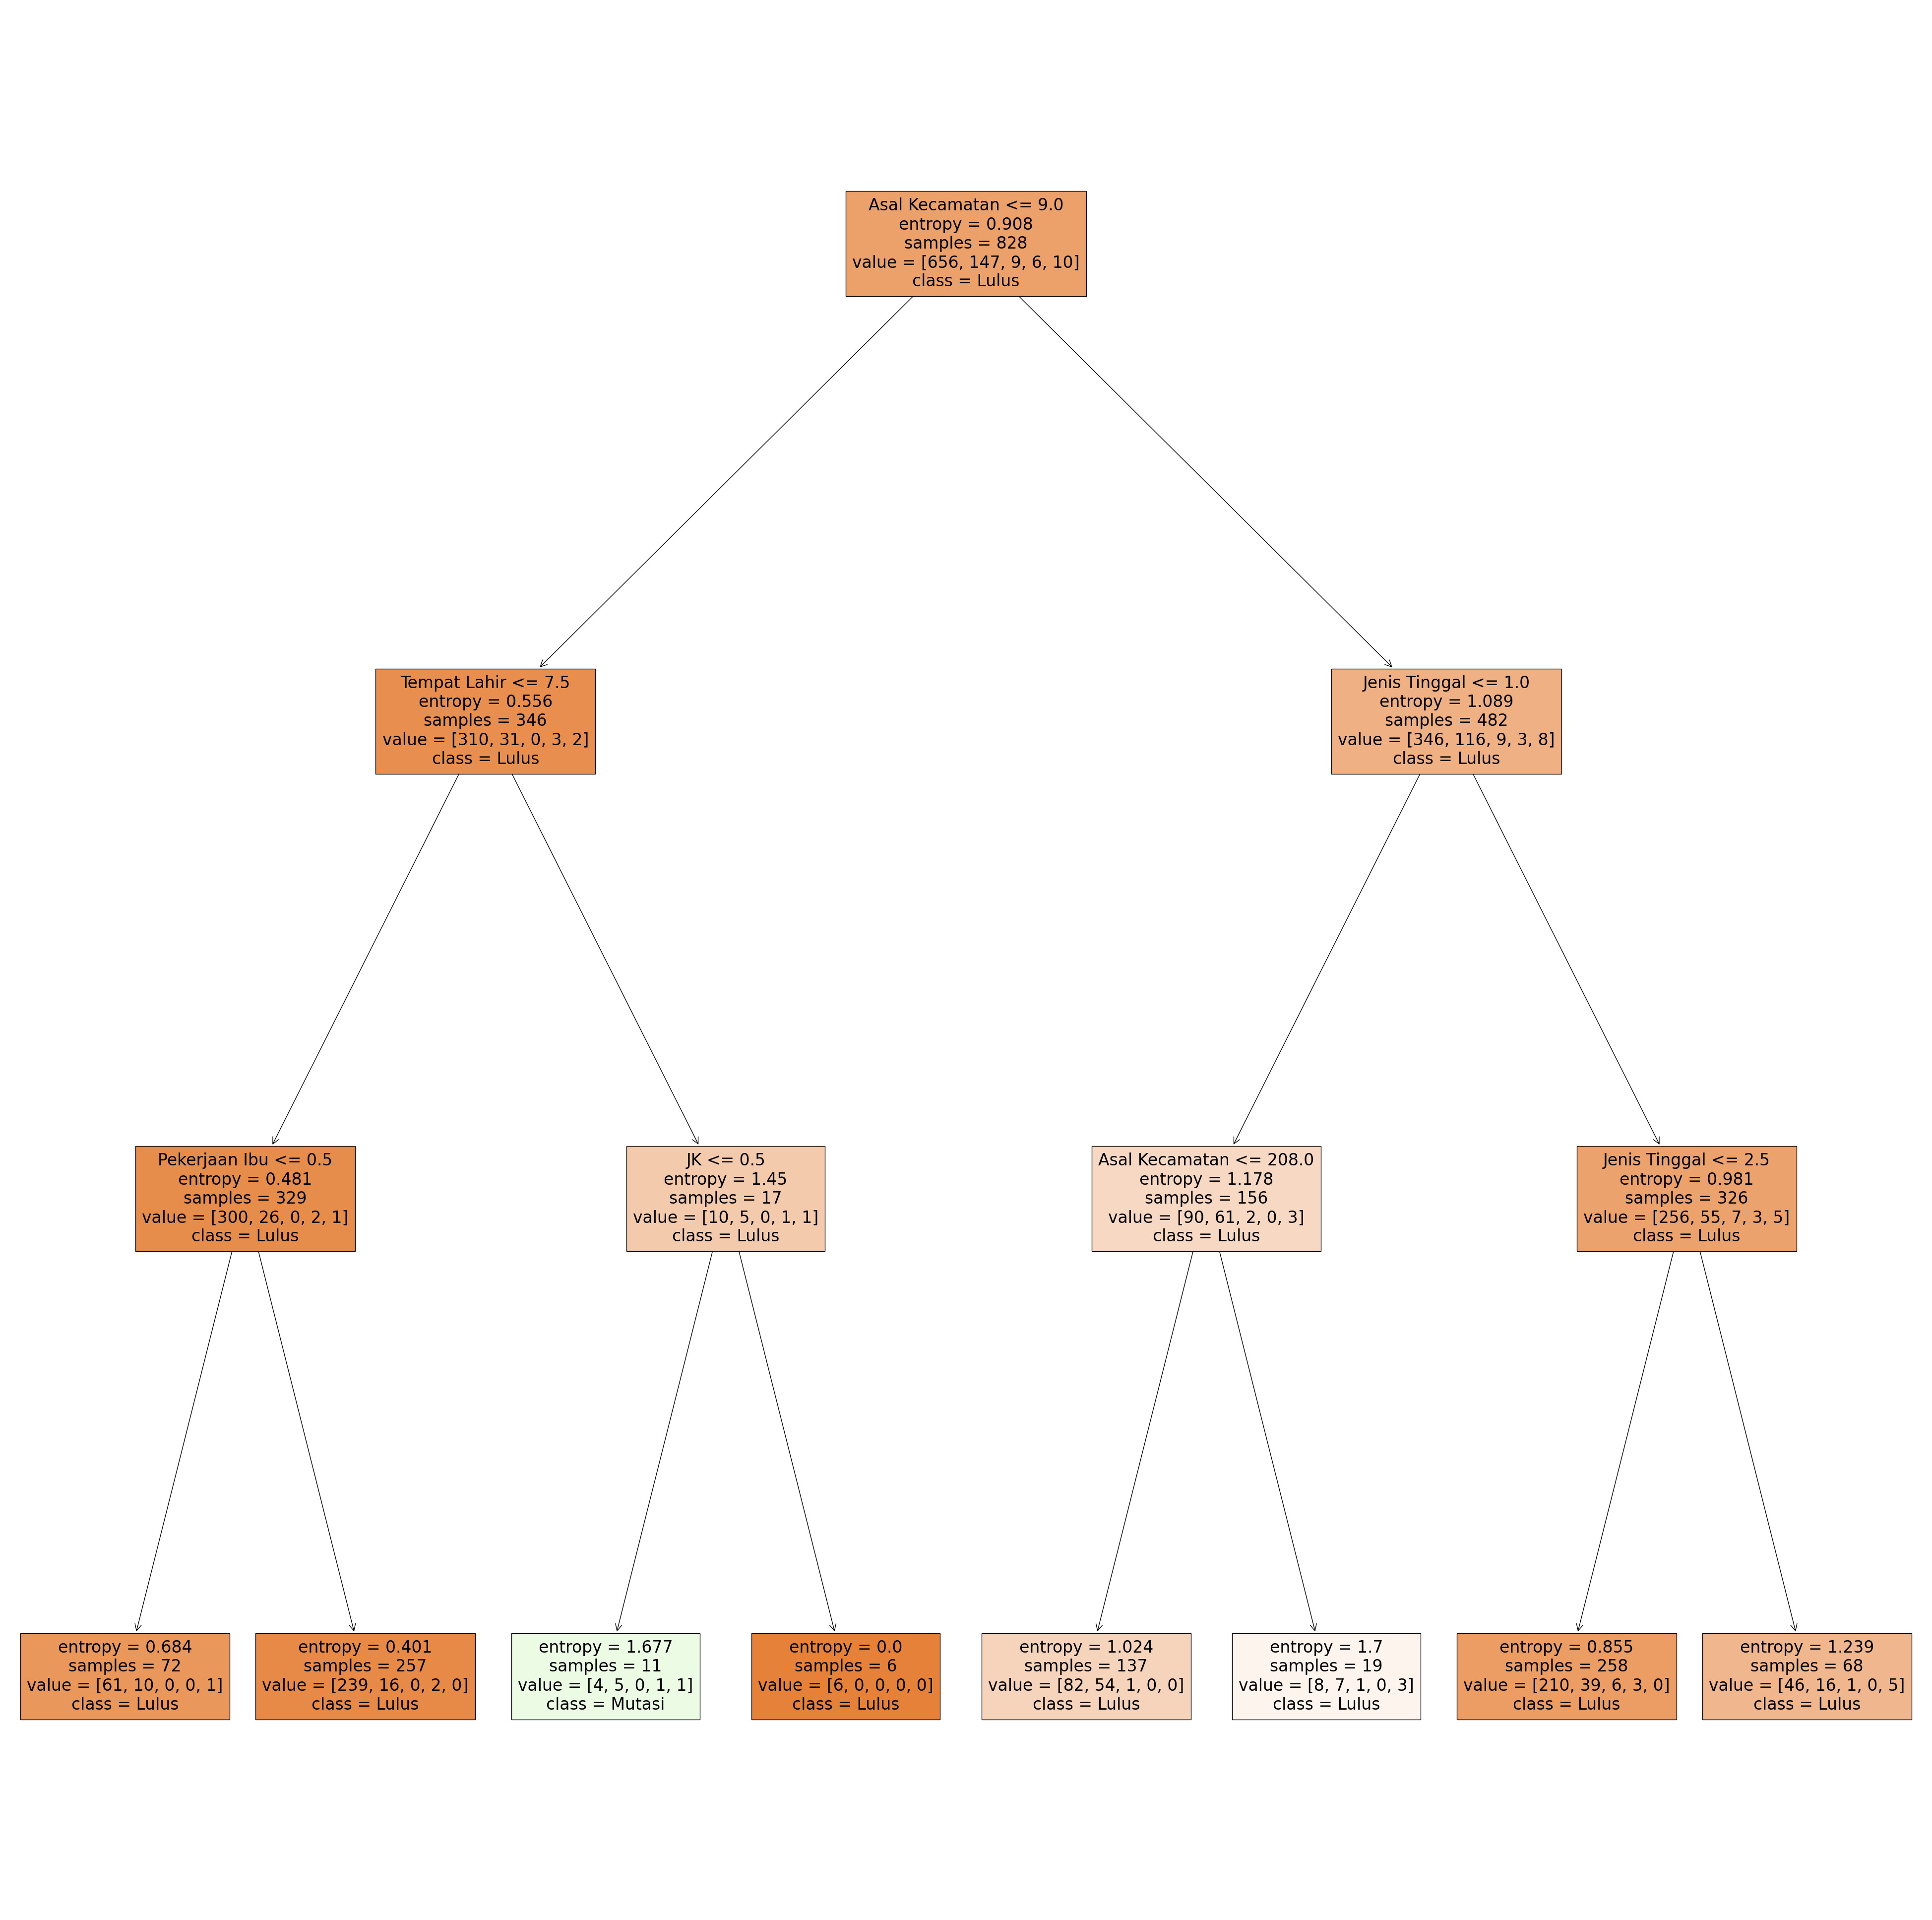

In [22]:
# plotting the decision tree
feature_names = ["JK", "Tempat Lahir", "Asal Kecamatan", "Jenis Tinggal", "Alat Transportasi", "Jenjang Pendidikan Ayh", "Pekerjaan Ayh", "Penghasilan Ayh", "Pekerjaan Ibu", "Penghasilan Ibu"]
class_names = ["Lulus", "Mutasi", "Dikeluarkan", "Mengundurkan Diri", "Lainnya"]

fig = plt.figure(figsize=(50,50))
plot = tree.plot_tree(dt_clf,
                      feature_names = feature_names,
                      class_names = class_names,
                      filled = True)

In [23]:
y_test.shape

(208,)

In [24]:
from sklearn.metrics import f1_score

# Misalkan y_test adalah label yang benar dan y_pred adalah hasil prediksi
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# f1_micro akan berisi skor F1 agregat
print(f1_weighted)

0.7012522361359571


In [25]:
# accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7836538461538461

In [26]:
# precision
from sklearn.metrics import precision_score

precision_score(y_test, y_pred, average='weighted')

0.6871794871794872

In [29]:
# recall
from sklearn.metrics import recall_score

recall_score(y_test, y_pred, average='weighted')

0.7836538461538461